# Polynomial Regression
 
## Objectives

After completing this lab, you will be able to:

* Use scikit-learn to implement Polynomial regression
* Create, train, and test a Polynomial regression model on real data


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Importing Data Sets</a>
2. <a href="#item32">Data Wrangling</a>
3. <a href="#item33">Exploratory Data Analysis (EDA)</a>
4. <a href="#item34">Model Evaluation</a>
5. <a href="#item35">Prediction and Decision Making</a>  

</font>
</div>

## Importing Data Sets and Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
# Load Data
def load_data(data_file= "../data/automobileEDA.csv"):
    data_frame = pd.read_csv(data_file)
    return data_frame

df = load_data()

## Data Wrangling

In [4]:
# verify successful load with some randomly selected records
#df.sample(5)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [26]:
# Check any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [27]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # only columns with missing values
print(missing_values.sort_values(ascending=False))

zero_counts = (df == 0).sum()
zero_counts = zero_counts[zero_counts > 0]  # only columns with missing values
print("-----------------------------")
print("zero_counts: \n", zero_counts)

stroke               4
horsepower-binned    1
dtype: int64
-----------------------------
zero_counts: 
 symboling     65
diesel       181
gas           20
dtype: int64


**Comment**:


<h2 id="item33">Exploratory Data Analysis (EDA)</h2>

In [ ]:
# Develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# Randomly selects 9 rows from the DataFrame
Z.sample(9)

In [70]:
Z.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [33]:
##  Check the size of the data points
Z.shape

(201, 4)

<h2 id="item34">Build The Model</h2>

In [71]:
### 1. Extract the input feature and labels from the dataset
x_highway_test = df[['highway-mpg']]
y_price_test = df['price']
# Ensure x_highway_test, y_price_test, and y_test have compatible shapes for 3D plotting
print(f"X_test is a {x_highway_test.ndim}-D Matrix of Shape {x_highway_test.shape}")
print(f"y_test is a {y_price_test.ndim}-D Matrix of Shape {y_price_test.shape}")

X_test is a 2-D Matrix of Shape (201, 1)
y_test is a 1-D Matrix of Shape (201,)


<h3 id="item333"> 1. Multiple Linear Regression</h3>

In [77]:
# 4. create a model object
regressor_model = linear_model.LinearRegression()

# 5. train the model in the training data
regressor_model.fit(Z, y_price_test)

# Print the coefficients
coef_multi_ =  regressor_model.coef_
intercept_multi_ = regressor_model.intercept_
# Print the coefficients
print ('Coefficients: ',coef_multi_)
print ('Intercept: ',intercept_multi_)

Coefficients:  [53.49574423  4.70770099 81.53026382 36.05748882]
Intercept:  -15806.624626329209


<h3 id="item334"> 2. Polynomial Linear Regression</h3>

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


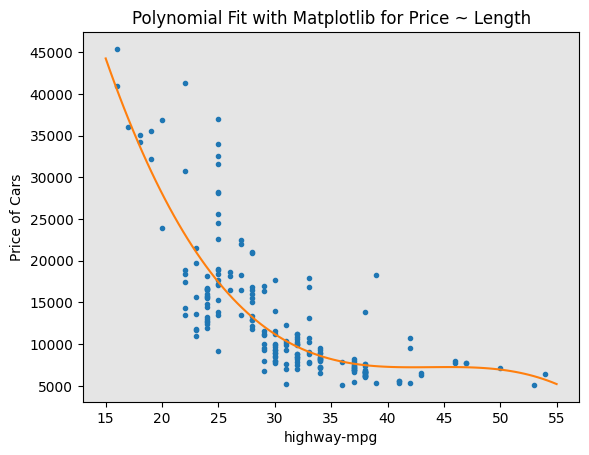

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [47]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

### use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x_highway, y_price_test, 3)
poly_fit = np.poly1d(f)
print(poly_fit)
## Plot the function
PlotPolly(poly_fit, x_highway, y_price_test, 'highway-mpg')
## Fit the function 
np.polyfit(x_highway, y_price_test, 3)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


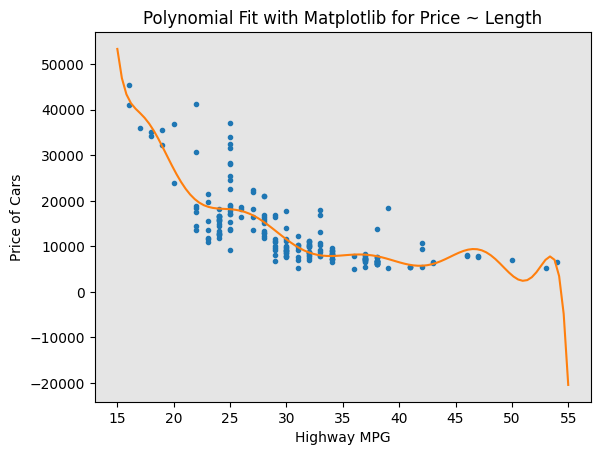

In [48]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x_highway, y_price_test, 11)
poly_fit_1 = np.poly1d(f1)
print(poly_fit_1)
PlotPolly(poly_fit_1,x_highway, y_price_test, 'Highway MPG')

In [42]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures
#  create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [49]:
Z_pr=pr.fit_transform(Z)
# In the original data, there are 201 samples and 4 features. you can check it using df.shape
Z.shape
# we convert the data type Z to type float to avoid conversion warnings later
Z = Z.astype(float)

In [50]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

In [80]:
# We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),
       ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())]
pipe_model=Pipeline(Input)
pipe_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scale', ...), ('polynomial', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [81]:
# normalize the data, perform a transform and fit the model simultaneously.
pipe_model.fit(Z,y_price_test)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scale', ...), ('polynomial', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


## Model Evaluation

<h3 id="item3332"> 1. Multiple Linear Regression</h3>

In [90]:
y_pred_multifit = regressor_model.predict(Z) ## this is Y_hat
print("Mean absolute error: %.2f" % mean_absolute_error(y_price_test, y_pred_multifit))
print("Mean squared error: %.2f" % mean_squared_error(y_price_test, y_pred_multifit))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_price_test, y_pred_multifit)))
print("R2-score: %.2f" % r2_score(y_price_test, y_pred_multifit)) # or using regressor_model.score(Z, y_price_test)

Mean absolute error: 2450.80
Mean squared error: 11980366.87
Root mean squared error: 3461.27
R2-score: 0.81


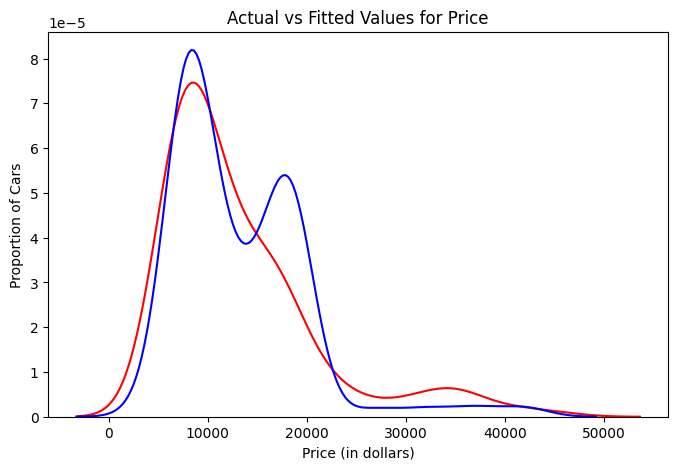

In [89]:
fig, ax1 = plt.subplots(figsize=(8,5))

# Actual values
sns.kdeplot(
    y_price_test, 
    fill=False,          # only the curve
    color="red", 
    label="Actual Value",
    ax=ax1
)

# Predicted/fitted values
sns.kdeplot(
    y_pred, 
    fill=False, 
    color="blue", 
    label="Fitted Values",
    ax=ax1
)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Comment:**
We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement. 


<h3 id="item3342"> 2. Polynomial Linear Regression</h3>

In [86]:
# normalize the data, perform a transform and produce a prediction simultaneously.
y_pred_pipe =pipe_model.predict(Z)
y_pred_pipe[0:4]
y_pred = poly_fit_1(x_highway)
print("Mean absolute error: %.2f" % mean_absolute_error(y_price_test, y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_price_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_price_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_price_test, y_pred))

Mean absolute error: 2845.85
Mean squared error: 18703127.65
Root mean squared error: 4324.71
R2-score: 0.70


<h2>Prediction and Decision Making</h2>

<ul>
    <li><b>MSE</b>: The MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The MLR is much larger than for the Polynomial Fit.</li>
</ul>

<p>Comparing these two models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>